In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
# Load the dataset
df = pd.read_csv('Food_waste_management.csv')

In [4]:
# Initial inspection
print("--- Data Head ---")
print(df.head())

--- Data Head ---
       Country  combined figures (kg/capita/year)  \
0  Afghanistan                                126   
1      Albania                                127   
2      Algeria                                135   
3      Andorra                                123   
4       Angola                                144   

   Household estimate (kg/capita/year)  Household estimate (tonnes/year)  \
0                                   82                           3109153   
1                                   83                            238492   
2                                   91                           3918529   
3                                   84                              6497   
4                                  100                           3169523   

   Retail estimate (kg/capita/year)  Retail estimate (tonnes/year)  \
0                                16                         594982   
1                                16                          45058

In [5]:
print("\n--- Data Info ---")
df.info()


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 214 non-null    object
 1   combined figures (kg/capita/year)       214 non-null    int64 
 2   Household estimate (kg/capita/year)     214 non-null    int64 
 3   Household estimate (tonnes/year)        214 non-null    int64 
 4   Retail estimate (kg/capita/year)        214 non-null    int64 
 5   Retail estimate (tonnes/year)           214 non-null    int64 
 6   Food service estimate (kg/capita/year)  214 non-null    int64 
 7   Food service estimate (tonnes/year)     214 non-null    int64 
 8   Confidence in estimate                  214 non-null    object
 9   M49 code                                214 non-null    int64 
 10  Region                                  214 non-null   

In [6]:
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
Country                                   0
combined figures (kg/capita/year)         0
Household estimate (kg/capita/year)       0
Household estimate (tonnes/year)          0
Retail estimate (kg/capita/year)          0
Retail estimate (tonnes/year)             0
Food service estimate (kg/capita/year)    0
Food service estimate (tonnes/year)       0
Confidence in estimate                    0
M49 code                                  0
Region                                    0
Source                                    0
dtype: int64


In [7]:
# -- Data preprocessing --

# For classification, create a binary target variable:
# Let's classify countries into 'HighWaste' if their combined figures exceed the median
median_waste = df['combined figures (kg/capita/year)'].median()
df['HighWaste'] = (df['combined figures (kg/capita/year)'] > median_waste).astype(int)

In [8]:
# Select features for the model
features = [
    'Region',
    'Confidence in estimate',
    'Household estimate (kg/capita/year)',
    'Retail estimate (kg/capita/year)',
    'Food service estimate (kg/capita/year)'
]

In [9]:
# Drop rows with missing values in features or target
df.dropna(subset=features + ['HighWaste'], inplace=True)

In [10]:
# Encode categorical columns
for col in ['Region', 'Confidence in estimate']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [11]:
# Define X and y
X = df[features]
y = df['HighWaste']

In [12]:
# Scale numerical features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# Model training: Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Predictions
y_pred = model.predict(X_test)

In [16]:
# Evaluation
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Low Waste', 'High Waste']))


Accuracy Score: 0.9767441860465116

Classification Report:
               precision    recall  f1-score   support

   Low Waste       1.00      0.95      0.98        22
  High Waste       0.95      1.00      0.98        21

    accuracy                           0.98        43
   macro avg       0.98      0.98      0.98        43
weighted avg       0.98      0.98      0.98        43



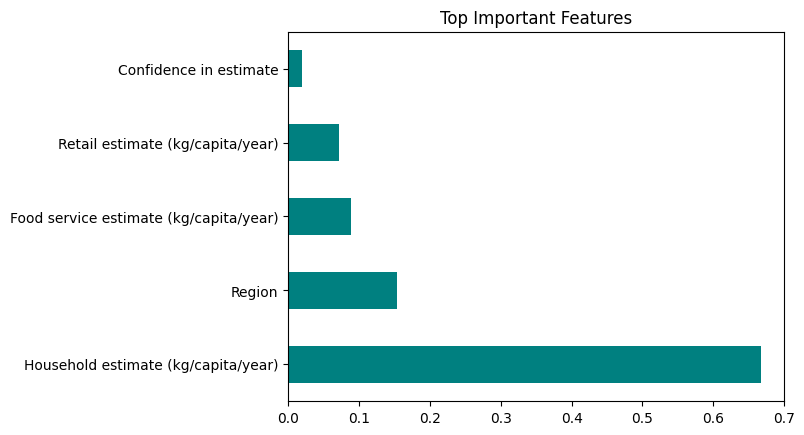

In [17]:
# Feature importance plot
feat_importances = pd.Series(model.feature_importances_, index=features)
feat_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top Important Features")
plt.show()

The feature importance plot ranks the variables based on how much they contribute to predicting food waste levels. This helps identify key drivers, such as income group, population size, or region, influencing the outcome. For example, if "Income group" is among the top features, it suggests economic status plays a major role in waste generation. This insight can guide targeted interventions or policy recommendations.

C:\Users\AI\AppData\Local\Temp\ipykernel_9356\4200584371.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Household estimate (kg/capita/year)', y='Country', data=top_countries, palette='Reds_r')


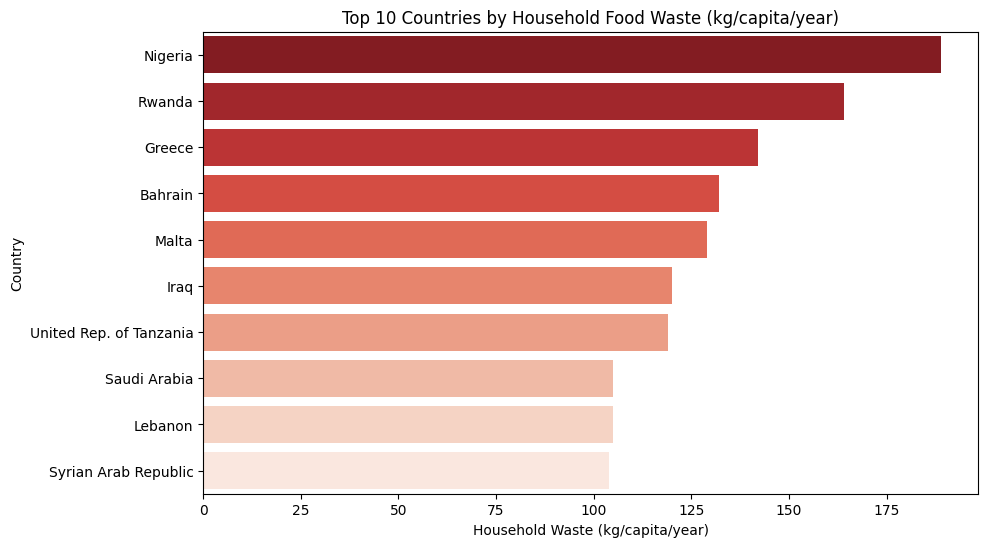

In [ ]:
# Top 10 countries by Household Waste
top_countries = df[['Country', 'Household estimate (kg/capita/year)']].sort_values(
    by='Household estimate (kg/capita/year)', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Household estimate (kg/capita/year)', y='Country', data=top_countries, palette='Reds_r')
plt.title('Top 10 Countries by Household Food Waste (kg/capita/year)')
plt.xlabel('Household Waste (kg/capita/year)')
plt.ylabel('Country')
plt.show()

This visualization reveals which countries are the top contributors to food waste at the household level, on a per-person basis. By highlighting the top 10, it allows stakeholders to focus efforts on nations where individual behavior change or policy interventions could have the most impact. Trends may reflect lifestyle, food availability, or cultural habits.

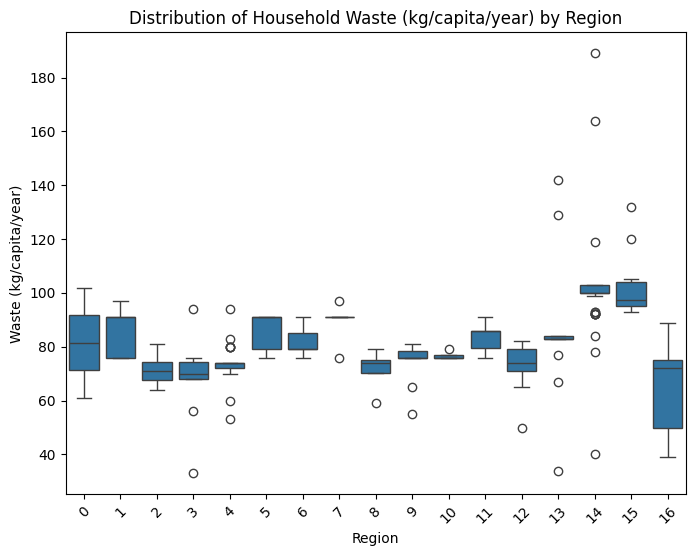

In [19]:
# Boxplot by Region
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='Household estimate (kg/capita/year)', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Household Waste (kg/capita/year) by Region')
plt.ylabel('Waste (kg/capita/year)')
plt.show()

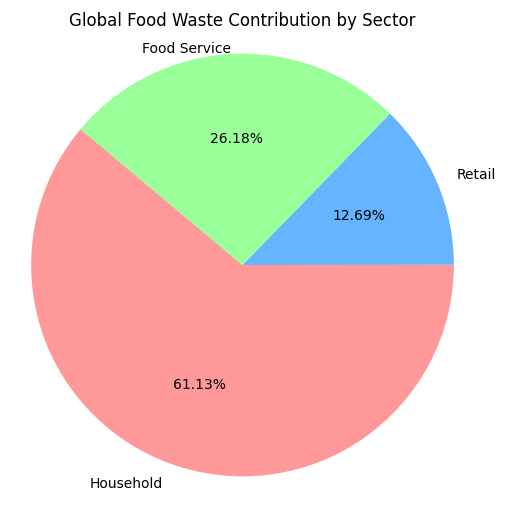

In [24]:
# Pie chart for global waste contribution by sector
totals = [
    df['Household estimate (tonnes/year)'].sum(),
    df['Retail estimate (tonnes/year)'].sum(),
    df['Food service estimate (tonnes/year)'].sum()
]

labels = ['Household', 'Retail', '\n\nFood Service']
colors = ['#ff9999','#66b3ff','#99ff99']
plt.figure(figsize=(6, 6))
plt.pie(totals, labels=labels, autopct='%1.2f%%', colors=colors, startangle=140)
plt.title('Global Food Waste Contribution by Sector')
plt.axis('equal')
plt.show()

The pie chart provides a clear snapshot of which sectors are most responsible for global food waste. If households contribute the largest share, it indicates a need for awareness and behavioral change at the consumer level. Conversely, if retail or food service dominate, solutions might involve better inventory management, redistribution strategies, or regulatory measures.